## Observations and Insights 

PostWork Analysis - 
There appears to only be one duplicate mouse affecting the original data set which makes it easier to remove.
Capomulin and Ramicane appear to have the lowest volume tomors - indicating that they may provide the best treatement option.
Our mice are roughly the same distribution of gender indicating no particular gender bias in the treatment.
Further box and line and scatter plots also indicate that capomulin has the largest decrease in tumor volume over time indicating it as the most ideal treatment method.

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress as linregress_lib

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.rename(columns= {"Mouse ID": "Mouse_ID", "Drug Regimen": "Drug_Regimen"}, inplace=True)
study_results.rename(columns= {"Mouse ID": "Mouse_ID", "Tumor Volume (mm3)": "Tumor_Volume", "Metastatic Sites": "Metastatic_Sites"}, inplace=True)
# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on=["Mouse_ID"], how="left")
# Display the data table for preview
mouse_study.head()

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_num = len(pd.unique(mouse_study['Mouse_ID']))
mice_num

249

In [18]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_dup = mouse_study.groupby(["Mouse_ID", "Timepoint"]).size().sort_values(ascending=False)
mice_dup

Mouse_ID  Timepoint
g989      20           2
          15           2
          10           2
          5            2
          0            2
                      ..
i334      20           1
          15           1
          10           1
          5            1
z969      45           1
Length: 1888, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mask = mouse_study.Mouse_ID != "g989"
ms = mouse_study.loc[mask].reset_index(drop=True)
ms.info()
ms.Mouse_ID.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mouse_ID          1880 non-null   object 
 1   Drug_Regimen      1880 non-null   object 
 2   Sex               1880 non-null   object 
 3   Age_months        1880 non-null   int64  
 4   Weight (g)        1880 non-null   int64  
 5   Timepoint         1880 non-null   int64  
 6   Tumor_Volume      1880 non-null   float64
 7   Metastatic_Sites  1880 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 117.6+ KB


248

In [21]:
# Checking the number of mice in the clean DataFrame.
mice_num = ms.Mouse_ID.nunique()
mice_num

248

## Summary Statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
ms["Drug_Regimen"].describe()

count          1880
unique           10
top       Capomulin
freq            230
Name: Drug_Regimen, dtype: object

In [23]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tvm = ms.groupby("Drug_Regimen").Tumor_Volume.mean()
tvmd = ms.groupby("Drug_Regimen").Tumor_Volume.median()
tvv = ms.groupby("Drug_Regimen").Tumor_Volume.var()
tvsd = ms.groupby("Drug_Regimen").Tumor_Volume.std()
tvs = ms.groupby("Drug_Regimen").Tumor_Volume.sem()
sumtable = pd.DataFrame()
sumtable["Tumor Volume Mean"] = tvm
sumtable["Tumor Volume Median"] = tvmd
sumtable["Tumor Volume Variance"] = tvv
sumtable["Tumor Volume Standard Deviation"] = tvsd
sumtable["Tumor Volume SEM"] = tvs
sumtable

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
sumtable2 = ms.groupby("Drug_Regimen").agg({"Tumor_Volume": ["mean", "median", "var", "std", "sem"]})
sumtable2

Tumor_Volume                                          
                     mean     median        var       std       sem
Drug_Regimen                                                       
Capomulin       40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin        52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol       52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril        55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol        54.331565  52.509285  66.173479  8.134708  0.596466
Placebo         54.033581  52.288934  61.168083  7.821003  0.581331
Propriva        52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane        40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn        54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol       53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug_Regimen'>

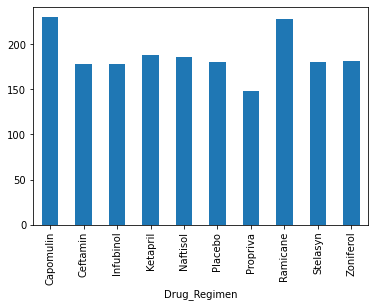

In [25]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar1 = ms.groupby("Drug_Regimen")["Timepoint"].size().plot(kind="bar")
bar1

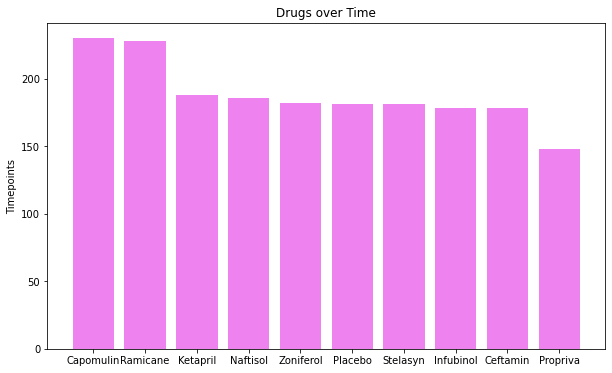

In [33]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
bar2 = ms["Drug_Regimen"].value_counts().reset_index()
bar2
bar2.columns = ["drug", "counts"]
bar2

plt.figure(figsize=(10,6))
plt.bar(bar2.drug, bar2.counts, color="violet")
plt.title("Drugs over Time")
plt.ylabel("Timepoints")
plt.show()

In [100]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
amount = ms["Sex"].value_counts().reset_index()
amount.columns = ["gender", "counts"]
amount
pie1 = ms.groupby(["Sex"]).sum().plot(kind="pie", y=amount."{counts"])
# cannot get this to work

,gender,counts
0,Male,958
1,Female,922


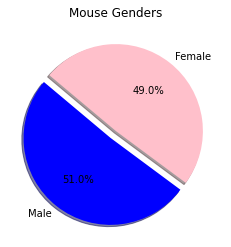

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie2 = ms["Sex"].value_counts().reset_index()
pie2
pie2.columns = ["gender", "counts"]

labels = pie2.gender


sizes = pie2["counts"]


colors = ["blue", "pink"]


explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Mouse Genders")
plt.show()

## Quartiles, Outliers and Boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
ms.head()
timep = ms.groupby("Mouse_ID")["Timepoint"].max().reset_index()
timep.Timepoint.sort_values(ascending=False)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ms2 = pd.merge(ms, timep, on=["Mouse_ID", "Timepoint"], how="inner")
ms2

mask = ms2.Drug_Regimen.isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
ms3 = ms2.loc[mask].reset_index(drop=True)
ms3

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [90]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mask = ms3.loc[ms3.Drug_Regimen == treatment, "Tumor_Volume"]
    
    # add subset 
    upper = mask.quantile(.75)
    lower = mask.quantile(.25)
    iqr = upper - lower
    bottom = lower - 1.5*iqr
    higher = upper + 1.5*iqr
    
    # Determine outliers using upper and lower bounds
    outlie = (ms3.Drug_Regimen == treatment) & ((ms3.Tumor_Volume > higher) | (ms3.Tumor_Volume < bottom))
    outliers = ms3.loc[outlie]
    
    data.append(mask)

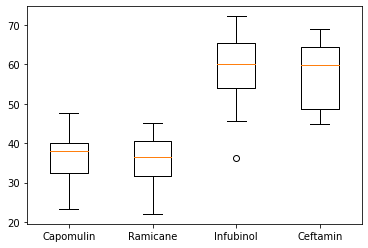

In [91]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(data, labels=treatments)
plt.show()

## Line and Scatter Plots

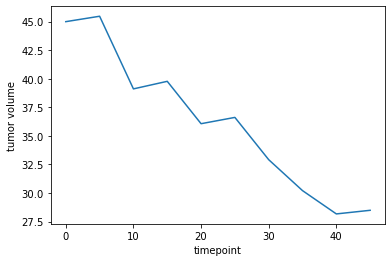

In [108]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line1 = ms.Drug_Regimen == "Capomulin"
line2 = ms.Mouse_ID == "x401"
line3 = ms[line1 & line2]

plt.plot(line3.Timepoint, line3.Tumor_Volume)
plt.xlabel("timepoint")
plt.ylabel("tumor volume")
plt.show()


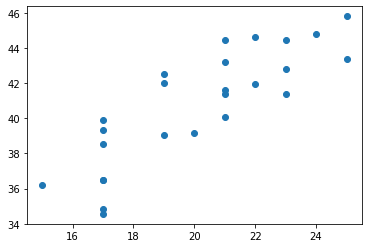

In [88]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter1 = ms.Drug_Regimen == "Capomulin"
scatter2 = ms.loc[scatter1].groupby("Mouse_ID")[["Tumor_Volume", "Weight (g)"]].mean().reset_index()
scatter2
plt.scatter(scatter2["Weight (g)"], scatter2["Tumor_Volume"])
plt.show()

## Correlation and Regression

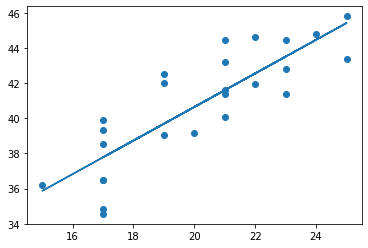

In [113]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
plt.scatter(scatter2["Weight (g)"], scatter2["Tumor_Volume"])
regress = linregress_lib(x=scatter2["Weight (g)"], y=scatter2.Tumor_Volume)
plt.plot(scatter2["Weight (g)"], regress.intercept + regress.slope* scatter2["Weight (g)"])
plt.show()
